In this notebook we explore the possibility of automating the process of comparing keyword clusters, or topics, as generated by NMF and understanding how topics rise and fall as `k` is increased. This is somewhat of a sideways exploration, but given the interest in *fitting* of topic models to various corpora, we thought the beginning of a conversation might prove interesting.

We start with loading the three files with the keyword clusters.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from varname import nameof #

In [2]:
# Inelegant but we are only loading three files:
topics_35 = open('../output/nmf_35_topics.txt', 'r').read().splitlines()
topics_45 = open('../output/nmf_45_topics.txt', 'r').read().splitlines()
topics_55 = open('../output/nmf_55_topics.txt', 'r').read().splitlines()

In [3]:
# The Jaccard coefficient is going to be our measure of similarity. 
# (This is entirely provisional, but it performs better here than the
# edit distance.)
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def tupler(list1, list2):
    listname1 = nameof(list1)[7:10]
    listname2 = nameof(list2)[7:10]
    edge_list = []
    for jk, jv in enumerate(list2):
        for ik, iv in enumerate(list1):
            if jaccard_similarity(iv.split(" "), jv.split(" ")) > 0.5:
                the_tuple = (f"{listname1}-{ik}", f"{listname2}-{jk}", jaccard_similarity(iv,jv))
                edge_list.append(the_tuple)
    return edge_list

In [4]:
edges_35_45 = tupler(topics_35, topics_45)
edges_45_55 = tupler(topics_45, topics_45)
print(len(edges_35_45), len(edges_45_55))

28 45


The `tupler` function is not returning the prefix for each node. When running the functionality by hand, it works.

In [29]:
listname1 = nameof(topics_35)[7:10]
listname2 = nameof(topics_45)[7:10]
edge_list_1 = []
for jk, jv in enumerate(topics_45):
        for ik, iv in enumerate(topics_35):
            if jaccard_similarity(iv.split(" "), jv.split(" ")) > 0.5:
                the_tuple = (f"35-{ik}", f"45-{jk}", jaccard_similarity(iv,jv))
                edge_list_1.append(the_tuple)
                # print(the_tuple)
edge_list_2 = []
for jk, jv in enumerate(topics_55):
        for ik, iv in enumerate(topics_45):
            if jaccard_similarity(iv.split(" "), jv.split(" ")) > 0.5:
                the_tuple = (f"45-{ik}", f"55-{jk}", jaccard_similarity(iv,jv))
                edge_list_2.append(the_tuple)
edge_list = edge_list_1 + edge_list_2

In [30]:
print(edge_list[-5:])

[('45-24', '55-42', 1.0), ('45-44', '55-44', 1.0), ('45-42', '55-48', 1.0), ('45-3', '55-52', 0.9090909090909091), ('45-41', '55-53', 0.9545454545454546)]


In [31]:
G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

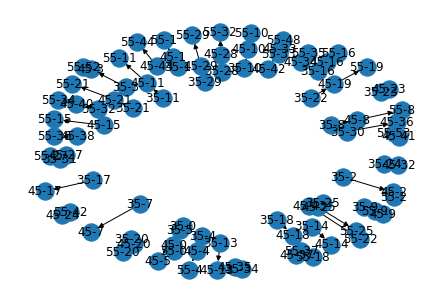

In [32]:
nx.draw(G, with_labels=True)
plt.show()

In [33]:
nx.write_graphml(G, "../output/topics.graphml")